In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob


In [9]:
src = cv2.imread("images/00.jpg")
img_orig = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY);
img=img_orig.copy()
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
(thresh, blackAndWhiteImage) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# cv2.imshow('Features', blackAndWhiteImage)



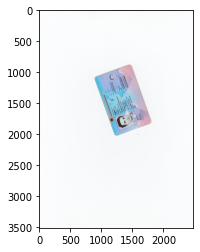

In [10]:
imgplot=plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()

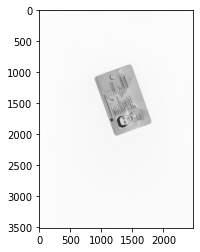

In [11]:
imgplot=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

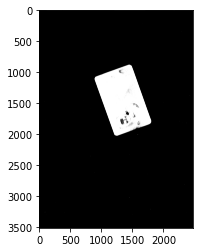

In [12]:
imgplot=plt.imshow(cv2.cvtColor(blackAndWhiteImage, cv2.COLOR_BGR2RGB))
plt.show()

((1352.2178955078125, 1449.9140625), (1015.33740234375, 639.9756469726562), 70.2879638671875)
[[ 879.74835 1079.9246 ]
 [1482.2212   864.0652 ]
 [1824.6875  1819.9036 ]
 [1222.2146  2035.763  ]]


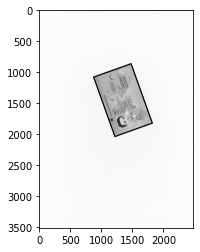

In [13]:
contours, hierarchy = cv2.findContours(blackAndWhiteImage,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x),reverse=True)
cnt = contours[0]
rect = cv2.minAreaRect(cnt)
print(rect)


box = cv2.boxPoints(rect)
print(box)

box = np.int0(box)
cv2.drawContours(img,[box],0,(0,0,255),20)
imgplot=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


3507 2480
[INFO] angle: 70.288


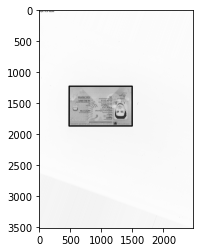

In [14]:
# angle = rect[-1]
# if angle < -45:
#         angle = -(90 + angle)
# else:
#     angle = -angle

(h, w) = img.shape[:2]
print(h,w)
center = (w // 2, h // 2)
angle=rect[-1]
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
print("[INFO] angle: {:.3f}".format(angle))
imgplot=plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()
